GIF saved as accuracy_evolution.gif


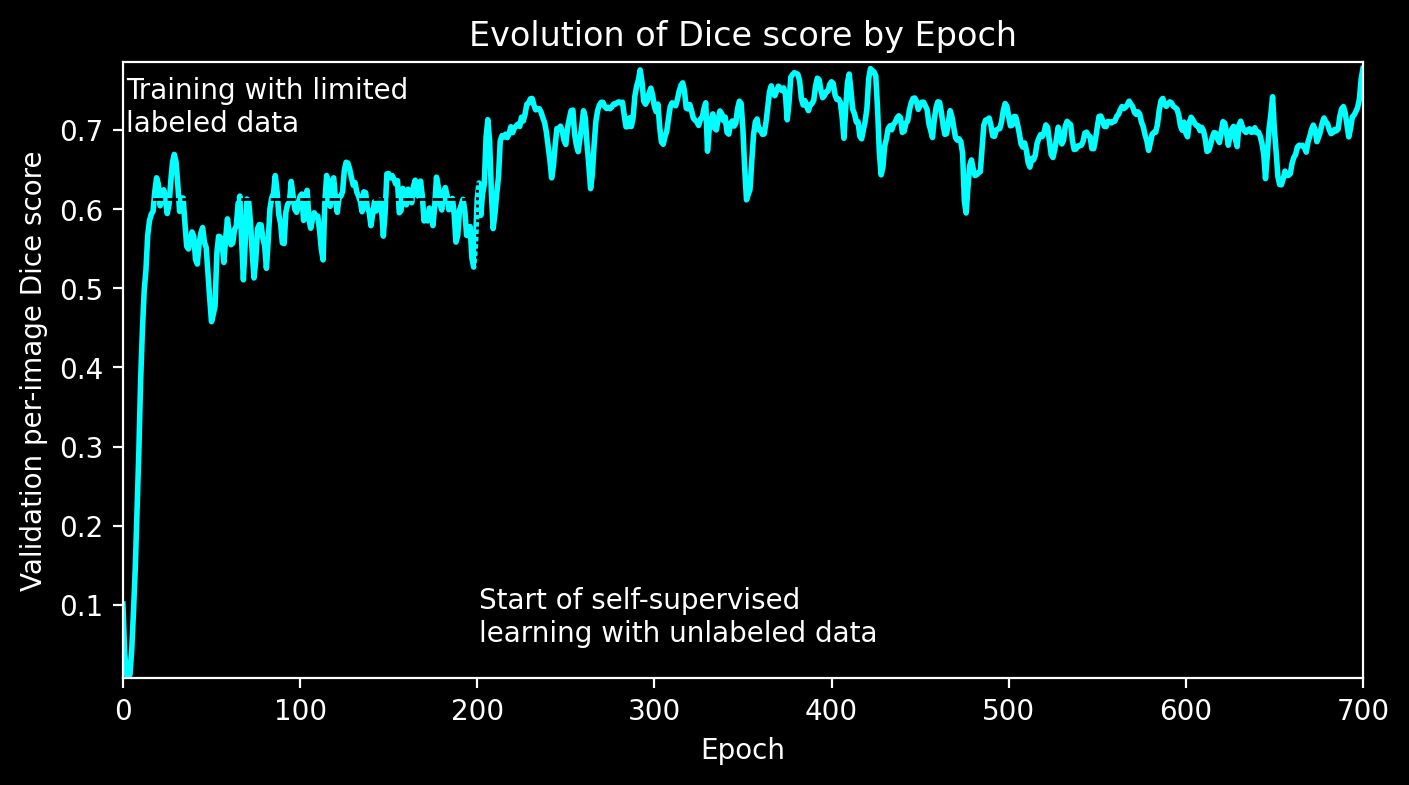

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200


# 1. Load your data
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/wandb.csv')
df['epoch'] = df['epoch'].astype(int)
df['accuracy'] = df['apricot-butterfly-13 - valid_dataset_f1'].astype(float)

# 2. Find the switch point at epoch 200
epoch_switch = 200
idx_switch = df.index[df['epoch'] == epoch_switch][0]
plateau_val = df['accuracy'].iloc[idx_switch]

# 3. Prepare the figure
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], lw=2)

ax.set_xlim(df['epoch'].min(), df['epoch'].max())
ax.set_ylim(df['accuracy'].min() * 0.99, df['accuracy'].max() * 1.01)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation per-image Dice score')
ax.set_title('Evolution of Dice score by Epoch')

# 4. Static annotations
# 4.1 Horizontal “plateau” line up to epoch 100
ax.hlines(
    y=plateau_val,
    xmin=df['epoch'].min(),
    xmax=epoch_switch,
    linestyle='--',           # singular
    linewidth=1,
    colors='black'
)
ax.text(
    x=df['epoch'].min() + 2,
    y=plateau_val + 0.1 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Training with limited\nlabeled data',
    va='bottom'
)

# 4.2 Vertical line marking the switch
ax.axvline(
    x=epoch_switch,
    linestyle=':',            # singular
    linewidth=1,
    color='black'
)
ax.text(
    x=epoch_switch + 1,
    y=ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Start of self-supervised\nlearning with unlabeled data',
    #rotation=90,
    va='bottom'
)

# 5. Build frames (with a little pause at the switch)
frames = list(range(idx_switch + 1)) + [idx_switch] * 60 + list(range(idx_switch + 1, len(df)))

# 6. Update function for FuncAnimation
def update(i):
    cur = frames[i]
    x = df['epoch'].iloc[:cur + 1]
    y = df['accuracy'].iloc[:cur + 1]
    line.set_data(x, y)
    return (line,)

# 7. Create animation
anim = FuncAnimation(
    fig, update,
    frames=len(frames), 
    blit=True,
    interval=30  # ms between frames
)

# 8. Save to GIF
writer = PillowWriter(fps=30)
#anim.save('accuracy_evolution.gif', writer=writer)

print("GIF saved as accuracy_evolution.gif")
# Plot the complete line (last frame)
x = df['epoch']
y = df['accuracy']

line.set_data(x, y)
# fig.patch.set_facecolor('black')  # Fondo del área total de la figura
# ax.set_facecolor('black')         # Fondo específico del área del gráfico

# Save the final frame
fig.patch.set_facecolor('white')  
ax.set_facecolor('white')         

# Cambiar color de línea y texto a oscuros
line.set_color('navy')  # color oscuro para buena visibilidad

# Ajustar textos y anotaciones:
ax.tick_params(colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.title.set_color('black')

# Ajustar textos adicionales
for text in ax.texts:
    text.set_color('black')

fig.savefig('final_frame_white.png', dpi=200, bbox_inches='tight', facecolor=fig.get_facecolor())


fig.patch.set_facecolor('black')  
ax.set_facecolor('black')         

# Cambiar color de línea y texto a claros
line.set_color('cyan')  # color claro para contraste

# Ajustar textos y anotaciones:
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')

# Ajustar textos adicionales
for text in ax.texts:
    text.set_color('white')

fig.savefig('final_frame_dark.png', dpi=200, bbox_inches='tight', facecolor=fig.get_facecolor())


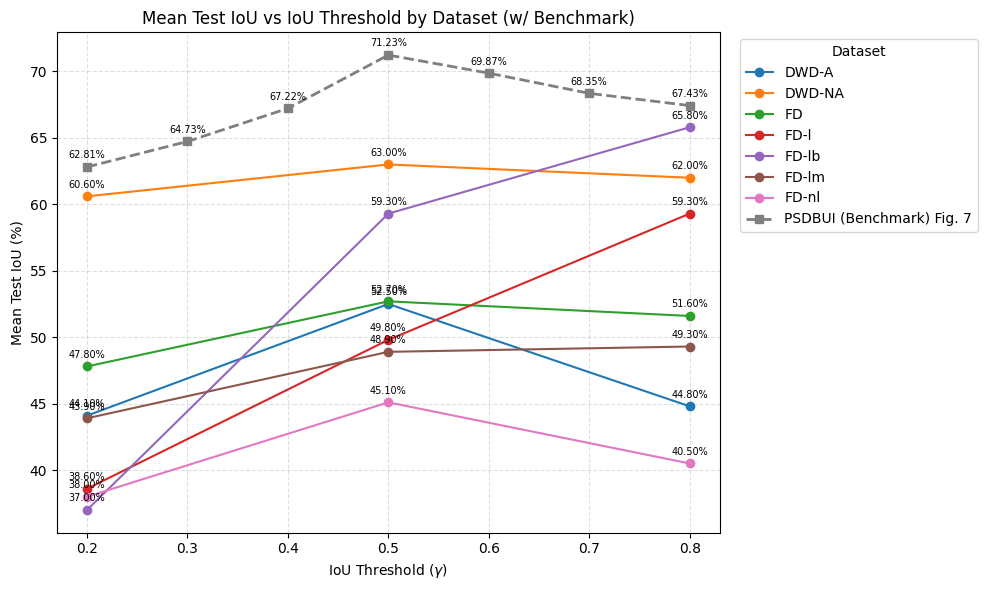

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')
#plt.style.use('dark_background')

# 1) Load your CSV
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/summary_wandb_assgan_gt.csv')

# 2) Extract the "mean" part of Test IoU and convert to percent
df['Test IoU (%)'] = (
    df['Test IoU']
      .str.split('±').str[0]   # take everything before "±"
      .astype(float) * 100     # convert to percent
)

# 3) Pivot so that each Group is a column, indexed by the IoU threshold
pivot = df.pivot(index='threshold',
                 columns='Group',
                 values='Test IoU (%)')

# 4) Rename to the acronyms in your Table 1
pivot = pivot.rename(columns={
    'data_uncorrected'             : 'FD',
    'uncorrected_l'                : 'FD-l',
    'uncorrected_nl'               : 'FD-nl',
    'uncorrected_lb'               : 'FD-lb',
    'uncorrected_lm'               : 'FD-lm',
    'data_corrected_w_annotation'  : 'DWD-A',
    'data_corrected_wo_annotation' : 'DWD-NA'
})

# 5) Benchmark series (γ vs IoU%)
bm_gamma = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
bm_iou   = [62.81, 64.73, 67.22, 71.23, 69.87, 68.35, 67.43]

# 6) Plot
plt.figure(figsize=(10, 6))

# 6a) Plot each dataset with a solid line + circle marker
for dataset in pivot.columns:
    plt.plot(pivot.index,
             pivot[dataset],
             marker='o',
             linestyle='-',
             linewidth=1.5,
             label=dataset)

# 6b) Plot the Benchmark with a dashed line + square marker
plt.plot(bm_gamma,
         bm_iou,
         marker='s',
         linestyle='--',
         linewidth=2,
         label='PSDBUI (Benchmark) Fig. 7')

# 7) Annotate every point
for dataset in pivot.columns:
    for x, y in zip(pivot.index, pivot[dataset]):
        plt.text(x, y + 0.5, f'{y:.2f}%', ha='center', va='bottom', fontsize=7)

for x, y in zip(bm_gamma, bm_iou):
    plt.text(x, y + 0.5, f'{y:.2f}%', ha='center', va='bottom', fontsize=7)

# 8) Labels, title, grid, legend
plt.xlabel(r'IoU Threshold ($\gamma$)')
plt.ylabel('Mean Test IoU (%)')
plt.title('Mean Test IoU vs IoU Threshold by Dataset (w/ Benchmark)')
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.legend(title='Dataset', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
#plt.show()

#Save the figure
plt.savefig('mean_test_iou_vs_iou_threshold_w.png', dpi=300, bbox_inches='tight')




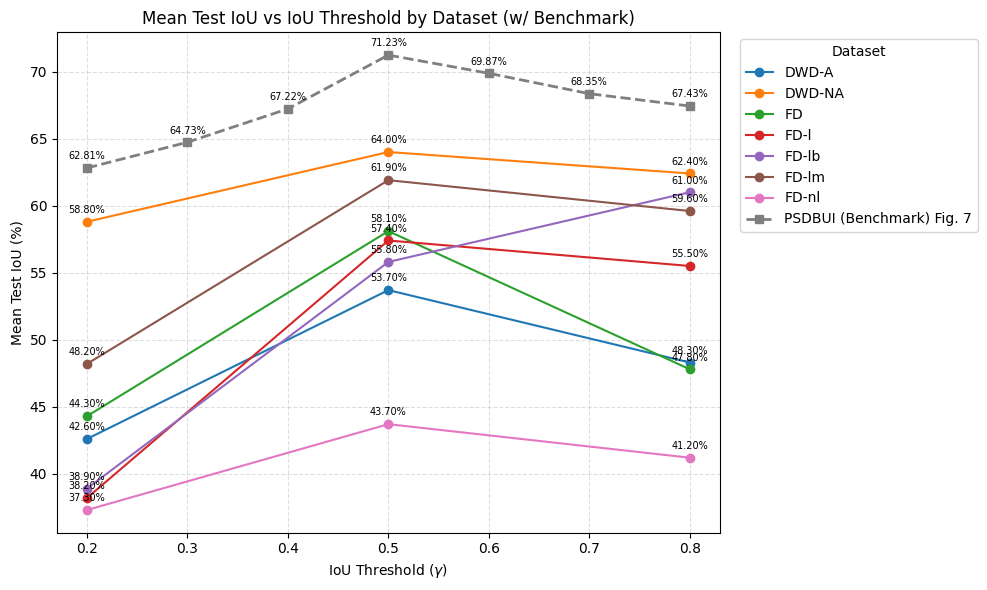

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')
#plt.style.use('dark_background')

# 1) Load your CSV
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/summary_assgan.csv')

# 2) Extract the "mean" part of Test IoU and convert to percent
df['Test IoU (%)'] = (
    df['Test IoU']
      .str.split('±').str[0]   # take everything before "±"
      .astype(float) * 100     # convert to percent
)

# 3) Pivot so that each Group is a column, indexed by the IoU threshold
pivot = df.pivot(index='threshold',
                 columns='Group',
                 values='Test IoU (%)')

# 4) Rename to the acronyms in your Table 1
pivot = pivot.rename(columns={
    'data_uncorrected'             : 'FD',
    'uncorrected_l'                : 'FD-l',
    'uncorrected_nl'               : 'FD-nl',
    'uncorrected_lb'               : 'FD-lb',
    'uncorrected_lm'               : 'FD-lm',
    'data_corrected_w_annotation'  : 'DWD-A',
    'data_corrected_wo_annotation' : 'DWD-NA'
})

# 5) Benchmark series (γ vs IoU%)
bm_gamma = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
bm_iou   = [62.81, 64.73, 67.22, 71.23, 69.87, 68.35, 67.43]

# 6) Plot
plt.figure(figsize=(10, 6))

# 6a) Plot each dataset with a solid line + circle marker
for dataset in pivot.columns:
    plt.plot(pivot.index,
             pivot[dataset],
             marker='o',
             linestyle='-',
             linewidth=1.5,
             label=dataset)

# 6b) Plot the Benchmark with a dashed line + square marker
plt.plot(bm_gamma,
         bm_iou,
         marker='s',
         linestyle='--',
         linewidth=2,
         label='PSDBUI (Benchmark) Fig. 7')

# 7) Annotate every point
for dataset in pivot.columns:
    for x, y in zip(pivot.index, pivot[dataset]):
        plt.text(x, y + 0.5, f'{y:.2f}%', ha='center', va='bottom', fontsize=7)

for x, y in zip(bm_gamma, bm_iou):
    plt.text(x, y + 0.5, f'{y:.2f}%', ha='center', va='bottom', fontsize=7)

# 8) Labels, title, grid, legend
plt.xlabel(r'IoU Threshold ($\gamma$)')
plt.ylabel('Mean Test IoU (%)')
plt.title('Mean Test IoU vs IoU Threshold by Dataset (w/ Benchmark)')
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.legend(title='Dataset', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
#plt.show()

#Save the figure
plt.savefig('mean_test_iou_vs_iou_threshold_w.png', dpi=300, bbox_inches='tight')




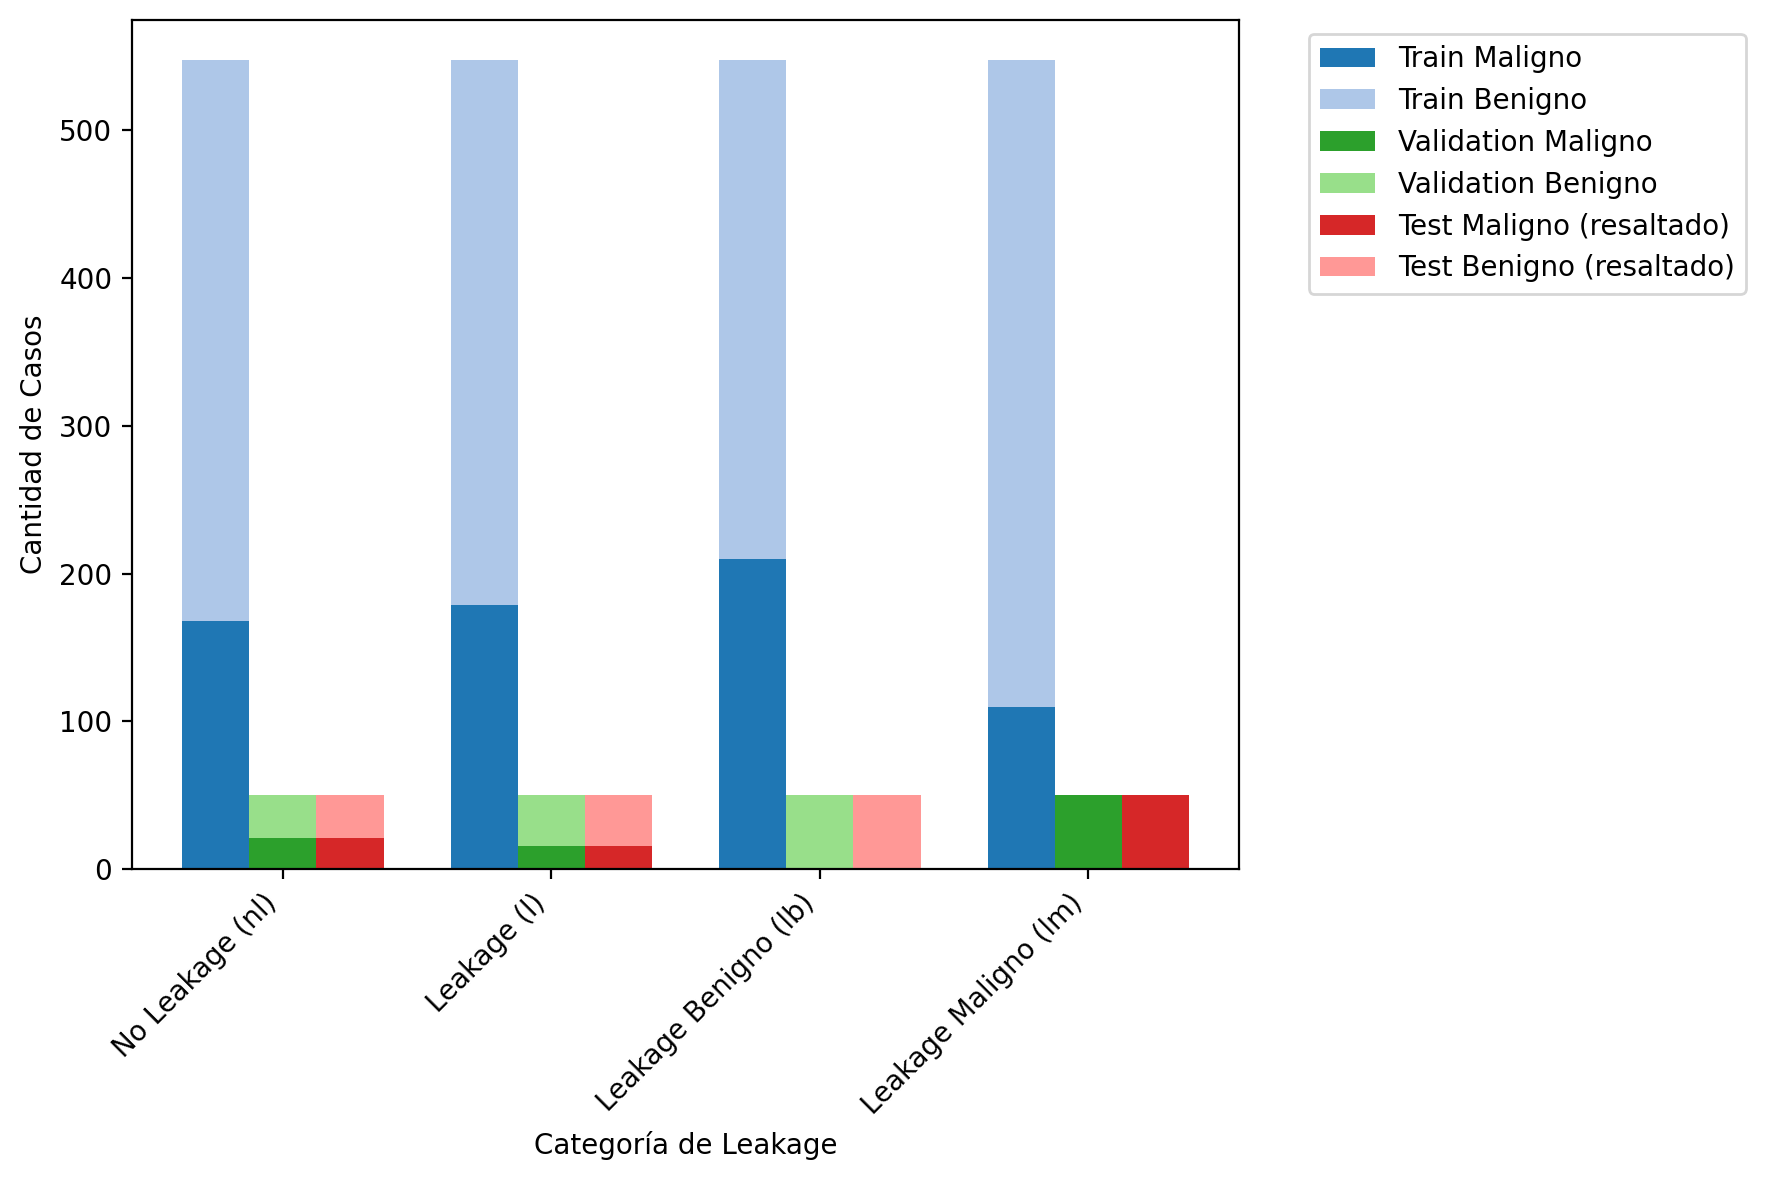

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 1) Define splits y tipos de leakage
splits = ['train', 'validation', 'test']
leak_types = {
    'No Leakage (nl)': 'nl',
    'Leakage (l)': 'l',
    'Leakage Benigno (lb)': 'lb',
    'Leakage Maligno (lm)': 'lm'
}

# 2) Lee los CSVs y acumula los conteos m/b
counts = {lt: {sp: {'m':0,'b':0} for sp in splits} for lt in leak_types}
for sp in splits:
    for label, suf in leak_types.items():

            df = pd.read_csv(f'/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/{sp}_{suf}.csv')
            counts[label][sp]['m'] = (df['clase']=='malignant').sum()
            counts[label][sp]['b'] = (df['clase']=='benign').sum()

# 3) Prepara ejes y colores
categories = list(leak_types.keys())
x = np.arange(len(categories))
width = 0.25

# Colors por split/clase (aquí test en rojo para resaltar)
colors = {
    'train':      {'m':'#1f77b4',  'b':'#aec7e8'},
    'validation': {'m':'#2ca02c',  'b':'#98df8a'},
    'test':       {'m':'#d62728',  'b':'#ff9896'}
}

plt.figure(figsize=(9,6))

# 4) Dibuja cada split como barras apiladas
for i, sp in enumerate(splits):
    xs = x + (i-1)*width
    m_vals = [counts[cat][sp]['m'] for cat in categories]
    b_vals = [counts[cat][sp]['b'] for cat in categories]
    plt.bar(xs, m_vals, width, color=colors[sp]['m'])
    plt.bar(xs, b_vals, width, bottom=m_vals, color=colors[sp]['b'])

# 5) Etiquetas y leyenda
plt.xticks(x, categories, rotation=45, ha='right')
plt.xlabel('Categoría de Leakage')
plt.ylabel('Cantidad de Casos')

legend_elems = [
    Patch(facecolor=colors['train']['m'],      label='Train Maligno'),
    Patch(facecolor=colors['train']['b'],      label='Train Benigno'),
    Patch(facecolor=colors['validation']['m'], label='Validation Maligno'),
    Patch(facecolor=colors['validation']['b'], label='Validation Benigno'),
    Patch(facecolor=colors['test']['m'],       label='Test Maligno (resaltado)'),
    Patch(facecolor=colors['test']['b'],       label='Test Benigno (resaltado)'),
]
plt.legend(handles=legend_elems, bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


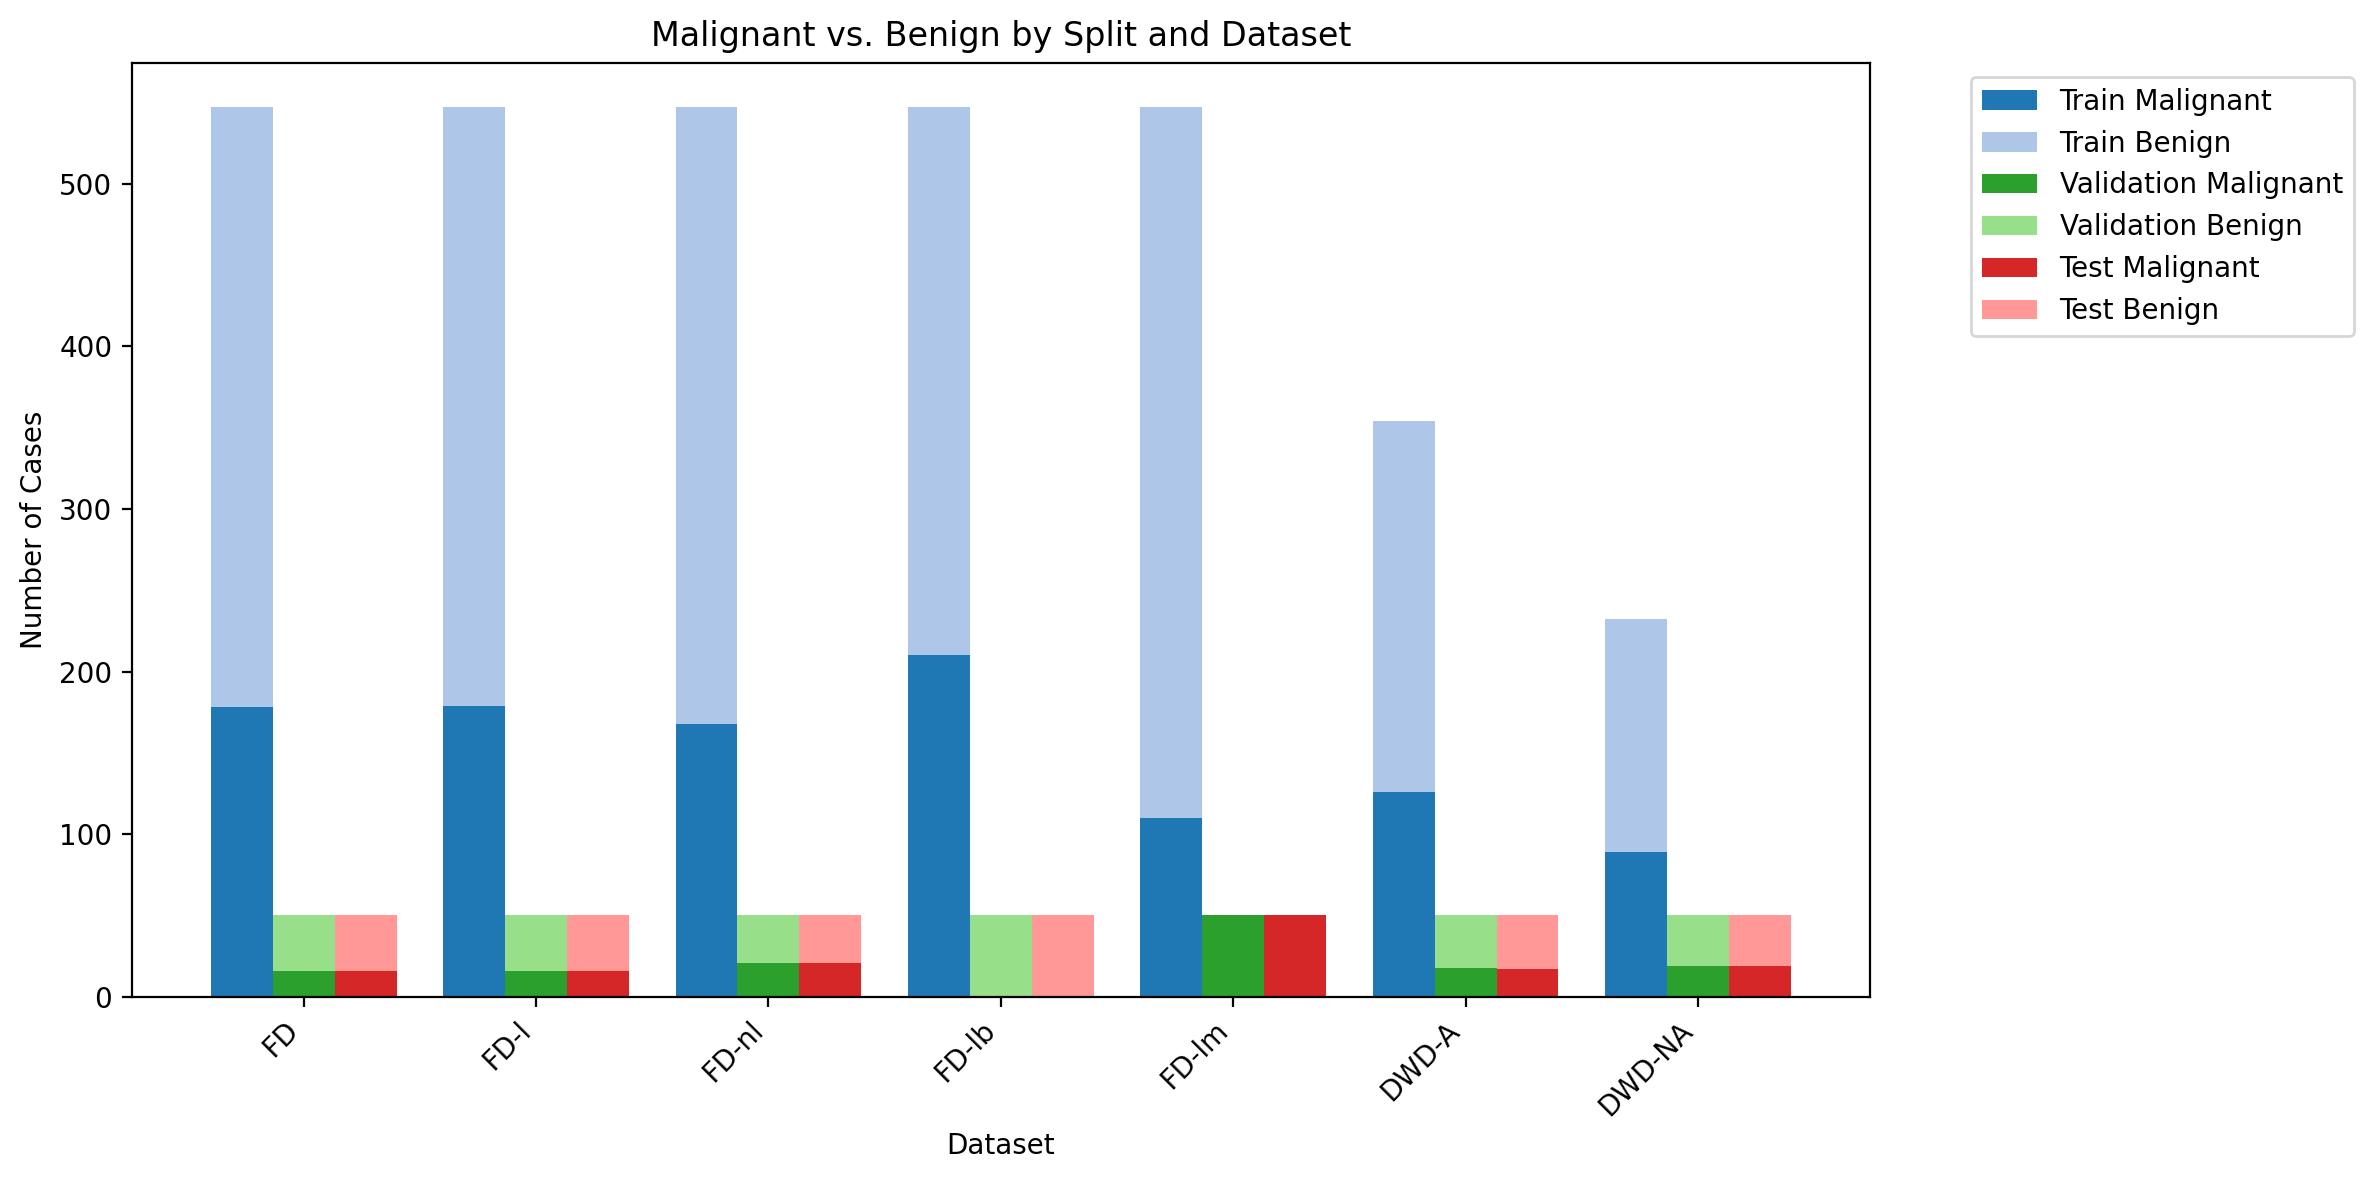

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 1) Splits
splits = ['train', 'validation', 'test']

# 2) Dataset groups in the exact order you want:
#    key = label on the x‐axis
#    value = either leak‐suffix or folder name
groups = {
    'FD'    : 'data_uncorrected',            # uncorrected → FD
    'FD-l'  : 'l',                           # full dataset with leakage
    'FD-nl' : 'nl',                          # full dataset without leakage
    'FD-lb' : 'lb',                          # full dataset benign leakage only
    'FD-lm' : 'lm',                          # full dataset malignant leakage only
    'DWD-A' : 'data_corrected_w_annotation', # without duplicates, with annotation
    'DWD-NA': 'data_corrected_wo_annotation' # without duplicates, without annotation
}

data_root = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data'

# 3) Init counts[group][split] = {'m':…, 'b':…}
counts = { grp: {sp:{'m':0,'b':0} for sp in splits} for grp in groups }

# 4) Fill counts
for grp_label, source in groups.items():
    for sp in splits:
        if source in ['l','nl','lb','lm']:
            # leakage suffix → files like train_l.csv, etc.
            path = os.path.join(data_root, f'{sp}_{source}.csv')
        else:
            # folder → files like data_uncorrected/train.csv, etc.
            path = os.path.join(data_root, source, f'{sp}.csv')
        df = pd.read_csv(path)

        # detect the filename column (to look for "malignant"/"benign")
        file_col = next(
            c for c in df.columns 
            if 'file' in c.lower() or 'name' in c.lower()
        )

        # count by scanning the filename
        counts[grp_label][sp]['m'] = df[file_col].str.contains('malignant', case=False, na=False).sum()
        counts[grp_label][sp]['b'] = df[file_col].str.contains('benign',   case=False, na=False).sum()

# 5) Plot setup
categories = list(groups.keys())
x          = np.arange(len(categories))
width      = 0.8 / len(splits)   # total cluster width = 0.8

colors = {
    'train':      {'m':'#1f77b4', 'b':'#aec7e8'},
    'validation': {'m':'#2ca02c', 'b':'#98df8a'},
    'test':       {'m':'#d62728', 'b':'#ff9896'}
}

plt.figure(figsize=(12,6))

# 6) Draw stacked bars for train/val/test in each group
for i, sp in enumerate(splits):
    xs = x - 0.4 + (i + 0.5) * width
    m_vals = [counts[grp][sp]['m'] for grp in categories]
    b_vals = [counts[grp][sp]['b'] for grp in categories]

    plt.bar(xs, m_vals, width,    color=colors[sp]['m'])
    plt.bar(xs, b_vals, width, bottom=m_vals, color=colors[sp]['b'])

    # … hasta el cálculo de m_vals y b_vals …

    # total_vals = [m_vals[j] + b_vals[j] for j in range(len(m_vals))]
    # m_props    = [m_vals[j] / total_vals[j] for j in range(len(m_vals))]
    # b_props    = [b_vals[j] / total_vals[j] for j in range(len(m_vals))]

    # plt.bar(xs, m_props, width,    color=colors[sp]['m'])
    # plt.bar(xs, b_props, width, bottom=m_props, color=colors[sp]['b'])


# 7) Labels & legend
plt.xticks(x, categories, rotation=45, ha='right')
plt.xlabel('Dataset')
plt.ylabel('Number of Cases')
plt.title('Malignant vs. Benign by Split and Dataset')

legend_handles = []
for sp in splits:
    legend_handles += [
        Patch(facecolor=colors[sp]['m'], label=f'{sp.title()} Malignant'),
        Patch(facecolor=colors[sp]['b'], label=f'{sp.title()} Benign')
    ]

plt.legend(handles=legend_handles, bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


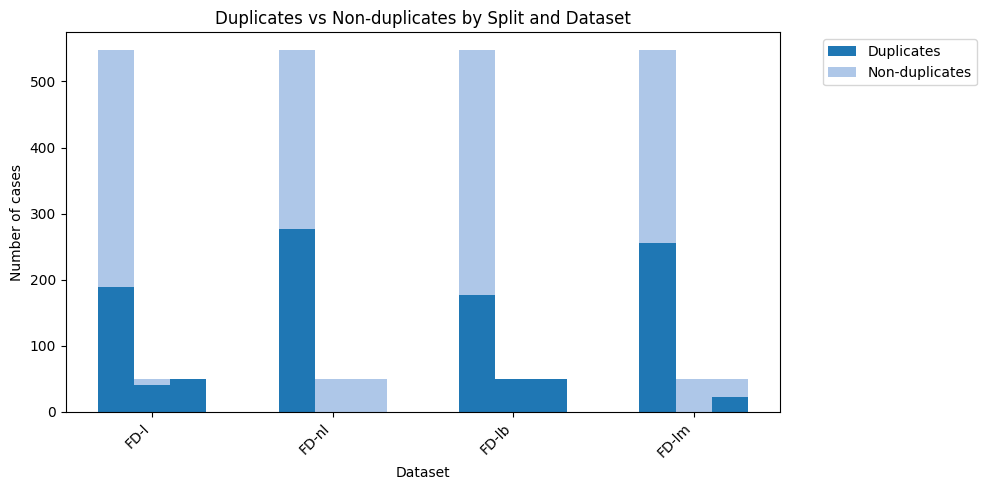

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 1) Define splits and the four groups you want
splits    = ['train', 'validation', 'test']
groups4   = {
    'FD-l' : 'l',
    'FD-nl': 'nl',
    'FD-lb': 'lb',
    'FD-lm': 'lm'
}
data_root = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data'

# 2) Loop through each CSV and count duplicates vs non-duplicates
dup_counts = {}
for grp_label, suffix in groups4.items():
    dup_counts[grp_label] = {}
    for sp in splits:
        path = os.path.join(data_root, f'{sp}_{suffix}.csv')
        df   = pd.read_csv(path)
        # convert 'True'/'False' (or true/false) strings to actual boolean values
        df['is_duplicate'] = df['is_duplicate'].astype(str).str.lower() == 'true'

        n_dup   = df['is_duplicate'].sum()
        n_nodup = (~df['is_duplicate']).sum()

        dup_counts[grp_label][sp] = {'dup': int(n_dup), 'nodup': int(n_nodup)}

# 3) Plot stacked bar chart
categories = list(groups4.keys())
x          = np.arange(len(categories))
width      = 0.6 / len(splits)
colors     = {'dup':'#1f77b4', 'nodup':'#aec7e8'}

plt.figure(figsize=(10,5))
for i, sp in enumerate(splits):
    xs     = x - 0.3 + (i + 0.5) * width
    d_vals = [dup_counts[g][sp]['dup']   for g in categories]
    n_vals = [dup_counts[g][sp]['nodup'] for g in categories]

    plt.bar(xs, d_vals, width,    color=colors['dup'])
    plt.bar(xs, n_vals, width, bottom=d_vals, color=colors['nodup'])

plt.xticks(x, categories, rotation=45, ha='right')
plt.xlabel('Dataset')
plt.ylabel('Number of cases')
plt.title('Duplicates vs Non-duplicates by Split and Dataset')

legend_handles = [
    Patch(facecolor=colors['dup'],   label='Duplicates'),
    Patch(facecolor=colors['nodup'], label='Non-duplicates')
]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [6]:
import os
import pandas as pd

# 1) Splits y grupos tal como antes
splits = ['train', 'validation', 'test']
groups = {
    'FD'    : 'data_uncorrected',
    'FD-l'  : 'l',
    'FD-nl' : 'nl',
    'FD-lb' : 'lb',
    'FD-lm' : 'lm',
    'DWD-A' : 'data_corrected_w_annotation',
    'DWD-NA': 'data_corrected_wo_annotation'
}
data_root = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data'

# 2) Construir lista de filas
rows = []
for grp_label, source in groups.items():
    for sp in splits:
        # carga el CSV correcto
        if source in ['l','nl','lb','lm']:
            path = os.path.join(data_root, f'{sp}_{source}.csv')
        else:
            path = os.path.join(data_root, source, f'{sp}.csv')
        df = pd.read_csv(path)

        # detectar columna con el nombre de archivo
        file_col = next(c for c in df.columns if 'file' in c.lower() or 'name' in c.lower())
        m = df[file_col].str.contains('malignant', case=False, na=False).sum()
        b = df[file_col].str.contains('benign',   case=False, na=False).sum()
        total = m + b
        rows.append({
            'Dataset'      : grp_label,
            'Split'        : sp,
            'Total'        : total,
            'Malignant'    : m,
            'Benign'       : b,
            '% Malignant'  : m/total*100,
            '% Benign'     : b/total*100
        })

# 3) DataFrame final
df_summary = pd.DataFrame(rows)
# opcional: pivot para presentar en forma más compacta
table = df_summary.pivot(index='Dataset', columns='Split', 
                         values=['Total','Malignant','Benign','% Malignant','% Benign'])
print(table)


        Total                   Malignant                   Benign         \
Split    test  train validation      test  train validation   test  train   
Dataset                                                                     
DWD-A    50.0  354.0       50.0      17.0  126.0       18.0   33.0  228.0   
DWD-NA   50.0  232.0       50.0      19.0   89.0       19.0   31.0  143.0   
FD       50.0  547.0       50.0      16.0  178.0       16.0   34.0  369.0   
FD-l     50.0  547.0       50.0      16.0  179.0       16.0   34.0  368.0   
FD-lb    50.0  547.0       50.0       0.0  210.0        0.0   50.0  337.0   
FD-lm    50.0  547.0       50.0      50.0  110.0       50.0    0.0  437.0   
FD-nl    50.0  547.0       50.0      21.0  168.0       21.0   29.0  379.0   

                   % Malignant                       % Benign             \
Split   validation        test      train validation     test      train   
Dataset                                                                    
D

GIF saved as accuracy_evolution.gif


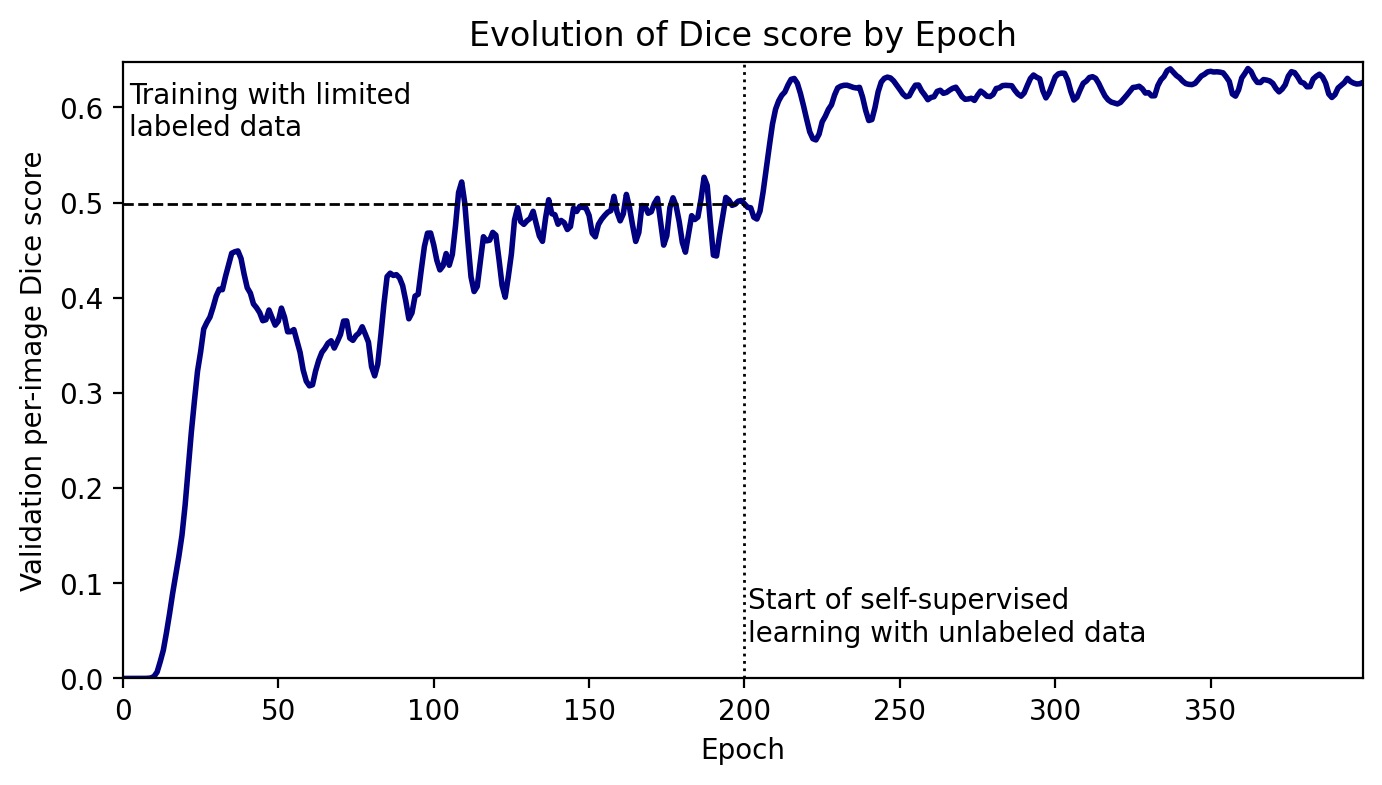

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200


# 1. Load your data
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_assgan_curve.csv')
df['epoch'] = df['epoch'].astype(int)
df['accuracy'] = df['_data_uncorrected_r1_gt0.5 - valid_dataset_iou'].astype(float)

# 2. Find the switch point at epoch 200
epoch_switch = 200
idx_switch = df.index[df['epoch'] == epoch_switch][0]
plateau_val = df['accuracy'].iloc[idx_switch]

# 3. Prepare the figure
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], lw=2)

ax.set_xlim(df['epoch'].min(), df['epoch'].max())
ax.set_ylim(df['accuracy'].min() * 0.99, df['accuracy'].max() * 1.01)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation per-image Dice score')
ax.set_title('Evolution of Dice score by Epoch')

# 4. Static annotations
# 4.1 Horizontal “plateau” line up to epoch 100
ax.hlines(
    y=plateau_val,
    xmin=df['epoch'].min(),
    xmax=epoch_switch,
    linestyle='--',           # singular
    linewidth=1,
    colors='black'
)
ax.text(
    x=df['epoch'].min() + 2,
    y=plateau_val + 0.1 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Training with limited\nlabeled data',
    va='bottom'
)

# 4.2 Vertical line marking the switch
ax.axvline(
    x=epoch_switch,
    linestyle=':',            # singular
    linewidth=1,
    color='black'
)
ax.text(
    x=epoch_switch + 1,
    y=ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Start of self-supervised\nlearning with unlabeled data',
    #rotation=90,
    va='bottom'
)

# 5. Build frames (with a little pause at the switch)
frames = list(range(idx_switch + 1)) + [idx_switch] * 60 + list(range(idx_switch + 1, len(df)))

# 6. Update function for FuncAnimation
def update(i):
    cur = frames[i]
    x = df['epoch'].iloc[:cur + 1]
    y = df['accuracy'].iloc[:cur + 1]
    line.set_data(x, y)
    return (line,)

# 7. Create animation
anim = FuncAnimation(
    fig, update,
    frames=len(frames), 
    blit=True,
    interval=30  # ms between frames
)

# 8. Save to GIF
writer = PillowWriter(fps=30)
#anim.save('accuracy_evolution.gif', writer=writer)

print("GIF saved as accuracy_evolution.gif")
# Plot the complete line (last frame)
x = df['epoch']
y = df['accuracy']

line.set_data(x, y)
# fig.patch.set_facecolor('black')  # Fondo del área total de la figura
# ax.set_facecolor('black')         # Fondo específico del área del gráfico

# Save the final frame
fig.patch.set_facecolor('white')  
ax.set_facecolor('white')         

# Cambiar color de línea y texto a oscuros
line.set_color('navy')  # color oscuro para buena visibilidad

# Ajustar textos y anotaciones:
ax.tick_params(colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.title.set_color('black')

# Ajustar textos adicionales
for text in ax.texts:
    text.set_color('black')


GIF saved as iou_evolution.gif


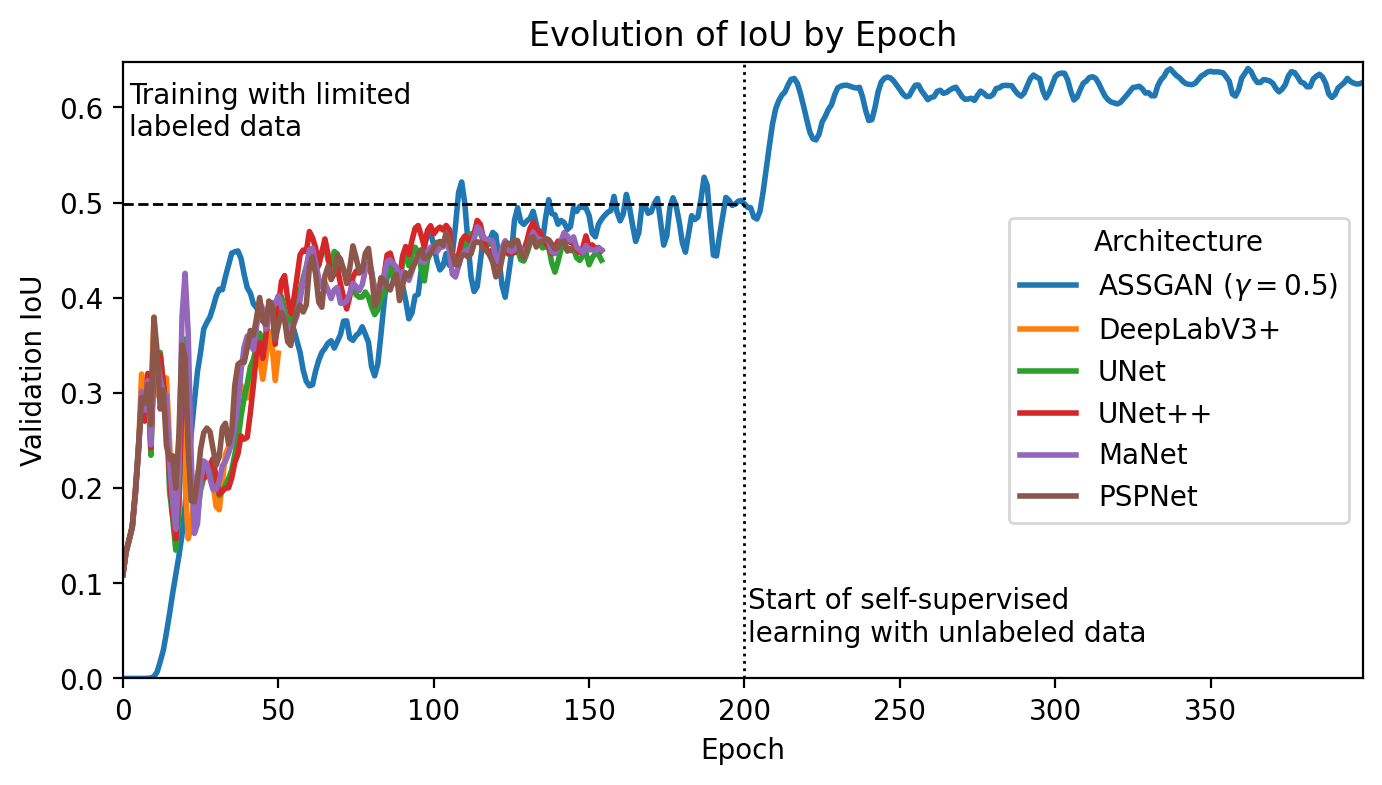

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

# ————— 1. Load your data —————
# a) labeled-data curve (Dice with gt0.5)
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_assgan_curve.csv')
df['epoch']    = df['epoch'].astype(int)
df['dice_gt']  = df['_data_uncorrected_r1_gt0.5 - valid_dataset_iou'].astype(float)

# b) unlabeled-data curves (IoU per architecture)
df_unlab = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_unlabel_curve.csv')
df_unlab['epoch'] = df_unlab['epoch'].astype(int)

# Map architecture names to their column in the CSV
architectures = {
    'DeepLabV3+':      '_data_uncorrected_r1_deeplabv3plus - valid_dataset_iou',
    'UNet':            '_data_uncorrected_r1_unet - valid_dataset_iou',
    'UNet++':          '_data_uncorrected_r1_unetplusplus - valid_dataset_iou',
    'MaNet':           '_data_uncorrected_r1_manet - valid_dataset_iou',
    'PSPNet':          '_data_uncorrected_r1_pspnet - valid_dataset_iou',
}

# ————— 2. Find the switch point —————
epoch_switch = 200
idx_switch   = df.index[df['epoch'] == epoch_switch][0]
plateau_val  = df['dice_gt'].iloc[idx_switch]

# ————— 3. Prepare the figure —————
fig, ax = plt.subplots(figsize=(8, 4))

# Creamos un Line2D para la curva principal
# now: ASSGAN with γ=0.5
main_line, = ax.plot([], [], lw=2, label=r'ASSGAN ($\gamma=0.5$)')

# Creamos un Line2D para cada arquitectura
lines = {}
for name, col in architectures.items():
    ln, = ax.plot([], [], lw=2, label=name)
    lines[name] = ln

# Ajustamos límites en X/Y para cubrir todas las curvas
all_values = pd.concat([
    df['dice_gt'],
    df_unlab[list(architectures.values())].astype(float).stack()
])
ax.set_xlim(df['epoch'].min(), df['epoch'].max())
ax.set_ylim(all_values.min() * 0.99, all_values.max() * 1.01)

ax.set_xlabel('Epoch')
ax.set_ylabel('Validation IoU')
ax.set_title('Evolution of IoU by Epoch')

# Añadimos la leyenda
ax.legend(title='Architecture', loc='center right')

# ————— 4. Static annotations —————
ax.hlines(
    y=plateau_val,
    xmin=df['epoch'].min(),
    xmax=epoch_switch,
    linestyle='--',
    linewidth=1,
    colors='black'
)
ax.text(
    x=df['epoch'].min() + 2,
    y=plateau_val + 0.1 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Training with limited\nlabeled data',
    va='bottom',
    color='black'
)

ax.axvline(
    x=epoch_switch,
    linestyle=':',
    linewidth=1,
    color='black'
)
ax.text(
    x=epoch_switch + 1,
    y=ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Start of self-supervised\nlearning with unlabeled data',
    va='bottom',
    color='black'
)

# ————— 5. Build frames (pause at switch) —————
frames = list(range(idx_switch + 1)) + [idx_switch] * 60 + list(range(idx_switch + 1, len(df)))

# ————— 6. Update function —————
def update(i):
    cur = frames[i]
    # main Dice curve
    x_main = df['epoch'].iloc[:cur+1]
    y_main = df['dice_gt'].iloc[:cur+1]
    main_line.set_data(x_main, y_main)

    # IoU curves per architecture
    for name, col in architectures.items():
        x2 = df_unlab['epoch'].iloc[:cur+1]
        y2 = df_unlab[col].astype(float).iloc[:cur+1]
        lines[name].set_data(x2, y2)

    # devolvemos todos los Line2D para blit
    return [main_line] + list(lines.values())

# ————— 7. Create animation —————
anim = FuncAnimation(
    fig, update,
    frames=len(frames),
    blit=True,
    interval=30
)

# ————— 8. Save to GIF —————
writer = PillowWriter(fps=30)
anim.save('iou_evolution.gif', writer=writer)
print("GIF saved as iou_evolution.gif")


GIF saved as assgan_thresholds.gif


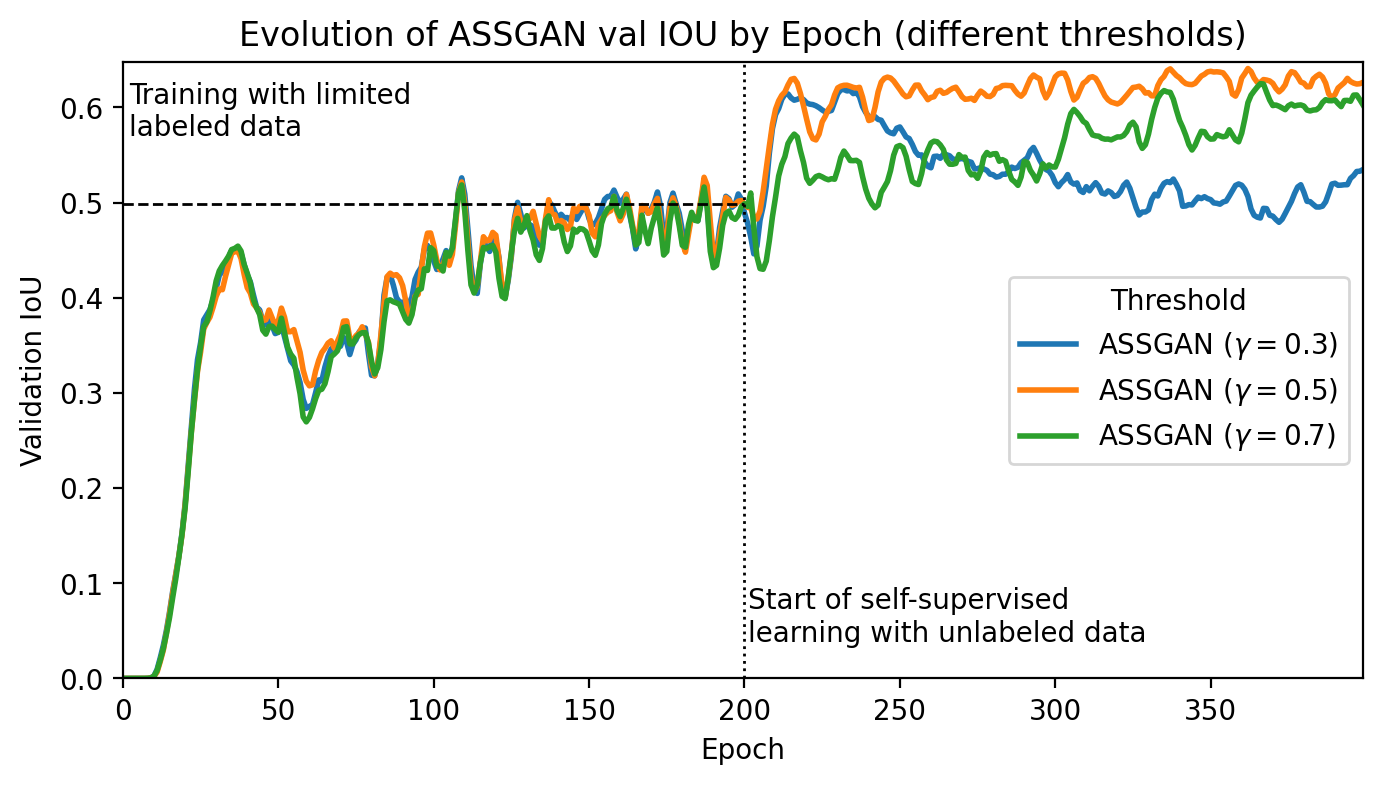

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200

# ————— 1. Load your data —————
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_assgan_curve.csv')
df['epoch'] = df['epoch'].astype(int)

# Define the three thresholds and their column names in your CSV
thresholds = [0.2, 0.5, 0.8]
col_map = {
    0.3: '_data_uncorrected_r1_gt0.2 - valid_dataset_iou',
    0.5: '_data_uncorrected_r1_gt0.5 - valid_dataset_iou',
    0.7: '_data_uncorrected_r1_gt0.8 - valid_dataset_iou',
}

# ————— 2. Find the switch point (same para todos) —————
epoch_switch = 200
idx_switch   = df.index[df['epoch'] == epoch_switch][0]
# Usamos la curva de γ=0.5 para la línea de plateau
plateau_val  = df[col_map[0.5]].astype(float).iloc[idx_switch]

# ————— 3. Prepare the figure —————
fig, ax = plt.subplots(figsize=(8, 4))

# Creamos un Line2D para cada umbral
lines = {}
for γ, col in col_map.items():
    label = rf'ASSGAN ($\gamma={γ}$)'
    ln, = ax.plot([], [], lw=2, label=label)
    lines[γ] = ln

# Ajustamos límites combinando los tres
all_vals = pd.concat([ df[col].astype(float) for col in col_map.values() ])
ax.set_xlim(df['epoch'].min(), df['epoch'].max())
ax.set_ylim(all_vals.min()*0.99, all_vals.max()*1.01)

ax.set_xlabel('Epoch')
ax.set_ylabel('Validation IoU')
ax.set_title('Evolution of ASSGAN val IOU by Epoch (different thresholds)')

# Legend en la parte media-derecha
ax.legend(title='Threshold', loc='center right')

# ————— 4. Static annotations —————
ax.hlines(
    y=plateau_val,
    xmin=df['epoch'].min(),
    xmax=epoch_switch,
    linestyle='--',
    linewidth=1,
    color='black'
)
ax.text(
    x=df['epoch'].min() + 2,
    y=plateau_val + 0.1*(ax.get_ylim()[1]-ax.get_ylim()[0]),
    s='Training with limited\nlabeled data',
    va='bottom', color='black'
)

ax.axvline(
    x=epoch_switch,
    linestyle=':',
    linewidth=1,
    color='black'
)
ax.text(
    x=epoch_switch + 1,
    y=ax.get_ylim()[0] + 0.05*(ax.get_ylim()[1]-ax.get_ylim()[0]),
    s='Start of self-supervised\nlearning with unlabeled data',
    va='bottom', color='black'
)

# ————— 5. Build frames (pause at switch) —————
frames = list(range(idx_switch+1)) + [idx_switch]*60 + list(range(idx_switch+1, len(df)))

# ————— 6. Update function —————
def update(i):
    cur = frames[i]
    x = df['epoch'].iloc[:cur+1]
    for γ, col in col_map.items():
        y = df[col].astype(float).iloc[:cur+1]
        lines[γ].set_data(x, y)
    return list(lines.values())

# ————— 7. Create animation —————
anim = FuncAnimation(
    fig, update,
    frames=len(frames),
    blit=True,
    interval=30  # ms
)

# ————— 8. Save to GIF —————
writer = PillowWriter(fps=30)
anim.save('assgan_thresholds.gif', writer=writer)
print("GIF saved as assgan_thresholds.gif")


GIF saved as assgan_comparison.gif


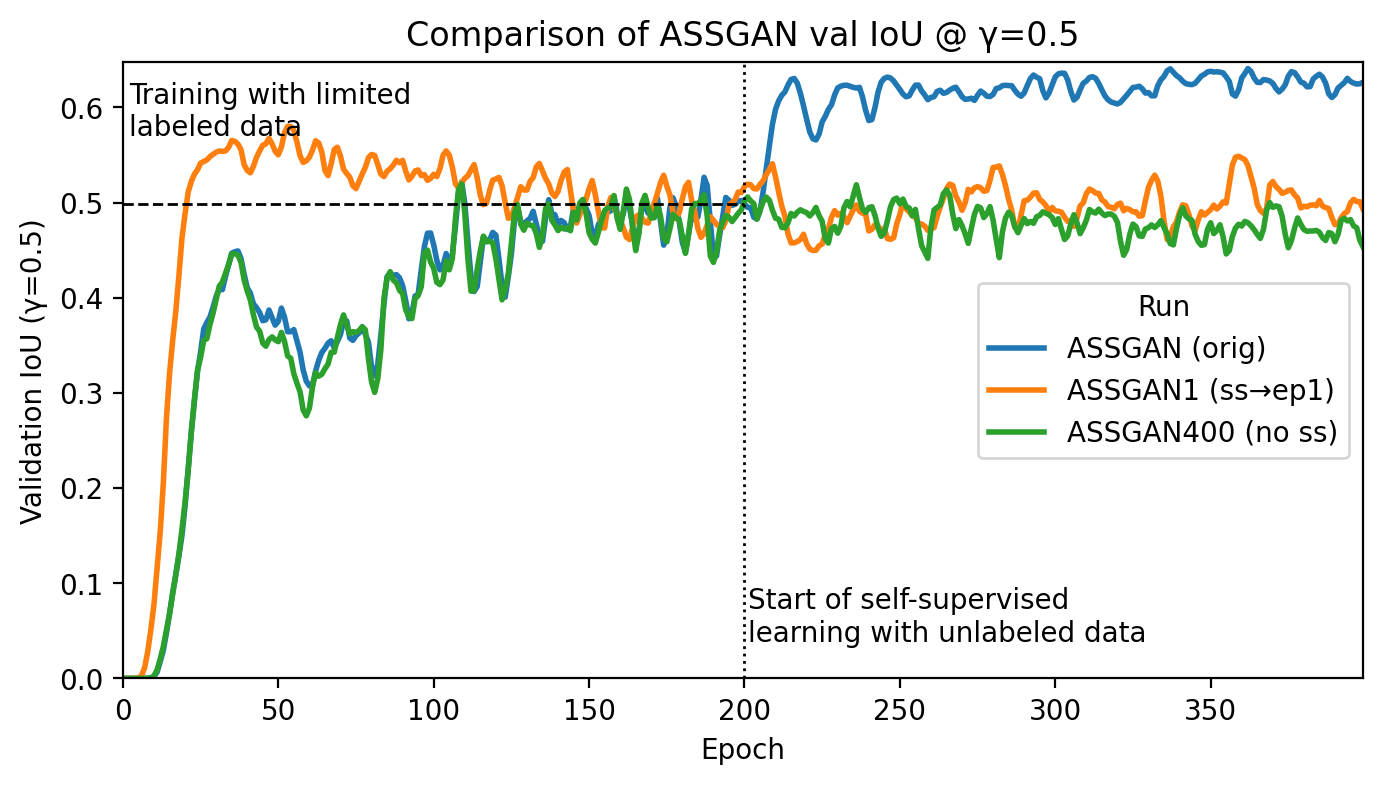

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200

# ————— 1. Carga tus datos —————
df_orig    = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_assgan_curve.csv')
df_ass1    = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_assgan1_curve.csv')
df_ass400  = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_assgan400_curve.csv')

for df in (df_orig, df_ass1, df_ass400):
    df['epoch'] = df['epoch'].astype(int)

# 2. Define the 0.5-threshold column
threshold = 0.5
col = '_data_uncorrected_r1_gt0.5 - valid_dataset_iou'

# 3. Optional: compute plateau value at epoch 200 (for original run)
epoch_switch = 200
idx_switch   = df_orig.index[df_orig['epoch'] == epoch_switch][0]
plateau_val  = df_orig[col].astype(float).iloc[idx_switch]

# 4. Prepare the figure
fig, ax = plt.subplots(figsize=(8, 4))

runs = {
    'ASSGAN (orig)':    df_orig,
    'ASSGAN1 (ss→ep1)': df_ass1,
    'ASSGAN400 (no ss)': df_ass400,
}
colors = {
    'ASSGAN (orig)':    'tab:blue',
    'ASSGAN1 (ss→ep1)': 'tab:orange',
    'ASSGAN400 (no ss)': 'tab:green',
}

lines = {}
for label, df_run in runs.items():
    ln, = ax.plot([], [], lw=2, label=label, color=colors[label])
    lines[label] = ln

ax.set_xlim(df_orig['epoch'].min(), df_orig['epoch'].max())
all_vals = pd.concat([df_run[col].astype(float) for df_run in runs.values()])
ax.set_ylim(all_vals.min()*0.99, all_vals.max()*1.01)

ax.set_xlabel('Epoch')
ax.set_ylabel(f'Validation IoU (γ={threshold})')
ax.set_title('Comparison of ASSGAN val IoU @ γ=0.5')
ax.legend(title='Run', loc='center right')

# 5. Static annotations (original run only)
ax.hlines(
    y=plateau_val,
    xmin=df_orig['epoch'].min(),
    xmax=epoch_switch,
    linestyle='--',
    linewidth=1,
    color='black'
)
ax.text(
    df_orig['epoch'].min() + 2,
    plateau_val + 0.1*(ax.get_ylim()[1] - ax.get_ylim()[0]),
    'Training with limited\nlabeled data',
    va='bottom',
    color='black'
)

ax.axvline(
    x=epoch_switch,
    linestyle=':',
    linewidth=1,
    color='black'
)
ax.text(
    epoch_switch + 1,
    ax.get_ylim()[0] + 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0]),
    'Start of self-supervised\nlearning with unlabeled data',
    va='bottom',
    color='black'
)

# 6. Build frames (pause at switch)
frames = list(range(idx_switch + 1)) + [idx_switch] * 60 + list(range(idx_switch + 1, len(df_orig)))

# 7. Update function
def update(i):
    cur = frames[i]
    for label, df_run in runs.items():
        x = df_run['epoch'].iloc[:cur+1]
        y = df_run[col].astype(float).iloc[:cur+1]
        lines[label].set_data(x, y)
    return list(lines.values())

# 8. Create and save animation
anim = FuncAnimation(
    fig, update,
    frames=len(frames),
    blit=True,
    interval=30  # ms per frame
)

writer = PillowWriter(fps=30)
anim.save('assgan_comparison.gif', writer=writer)
print("GIF saved as assgan_comparison.gif")



In [39]:
import pandas as pd

# 1. Load the W&B CSV
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_unlabeled1.csv')

# 2. Map the test‐file paths to your dataset abbreviations
dataset_map = {
    'data_uncorrected/test.csv':    'FD',
    'test_l.csv':                   'FD-l',
    'test_nl.csv':                  'FD-nl',
    'test_lb.csv':                  'FD-lb',
    'test_lm.csv':                  'FD-lm',
    'data_corrected_w_annotation':  'DWD-A',
    'data_corrected_wo_annotation': 'DWD-NA',
}
def label_dataset(path):
    for key, label in dataset_map.items():
        if key in path:
            return label
    return None

df['dataset'] = df['dataset.test'].apply(label_dataset)

# 3. Extract the model name from the `Name` column
#    (Name looks like "_uncorrected_lm_r3_deeplabv3plus")
#    so split on '_' and take the last token.
method_map = {
    'unet':          'U-Net',
    'unetplusplus':  'U-Net++',
    'manet':         'AttenU-Net',   # your CSV calls it "manet"
    'deeplabv3plus': 'DeepLabV3+',
    'pspnet':        'PSPNet',
}
def label_method(name):
    key = name.split('_')[-1]
    return method_map.get(key, key)

df['method'] = df['Name'].apply(label_method)

# 4. Group and compute mean & sample‐std (ddof=1) of IoU
stats = (
    df
    .groupby(['method', 'dataset'])['test_dataset_acc']
    .agg(mean='mean', std=lambda x: x.std(ddof=1))
    .reset_index()
)

# 5. Pivot to get methods as rows and datasets as columns
pivot = stats.pivot(index='method', columns='dataset')[['mean','std']]

# 6. (Optional) Print out in the “mean ± std” format for TeX
for method in pivot.index:
    row = pivot.loc[method]
    vals = []
    for ds in ['FD','FD-l','FD-nl','FD-lb','FD-lm','DWD-A','DWD-NA']:
        m = row[('mean', ds)]
        s = row[('std',  ds)]
        vals.append(f"$ {m:.3f} \\pm {s:.3f} $")
    print(f"{method} & " + " & ".join(vals) + r" \\")


AttenU-Net & $ 0.930 \pm 0.001 $ & $ 0.956 \pm 0.003 $ & $ 0.916 \pm 0.003 $ & $ 0.963 \pm 0.005 $ & $ 0.895 \pm 0.003 $ & $ 0.926 \pm 0.002 $ & $ 0.932 \pm 0.001 $ \\
DeepLabV3+ & $ 0.931 \pm 0.002 $ & $ 0.957 \pm 0.002 $ & $ 0.920 \pm 0.001 $ & $ 0.964 \pm 0.005 $ & $ 0.892 \pm 0.003 $ & $ 0.925 \pm 0.006 $ & $ 0.932 \pm 0.001 $ \\
PSPNet & $ 0.929 \pm 0.002 $ & $ 0.955 \pm 0.002 $ & $ 0.918 \pm 0.003 $ & $ 0.961 \pm 0.003 $ & $ 0.893 \pm 0.006 $ & $ 0.926 \pm 0.002 $ & $ 0.933 \pm 0.003 $ \\
U-Net & $ 0.930 \pm 0.002 $ & $ 0.955 \pm 0.003 $ & $ 0.917 \pm 0.004 $ & $ 0.961 \pm 0.004 $ & $ 0.897 \pm 0.003 $ & $ 0.927 \pm 0.000 $ & $ 0.930 \pm 0.003 $ \\
U-Net++ & $ 0.931 \pm 0.002 $ & $ 0.953 \pm 0.004 $ & $ 0.918 \pm 0.000 $ & $ 0.960 \pm 0.005 $ & $ 0.894 \pm 0.002 $ & $ 0.927 \pm 0.002 $ & $ 0.931 \pm 0.002 $ \\
